In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%precision 3
%matplotlib inline

In [2]:
df = pd.read_csv('../data/ch4_scores400.csv')
scores = np.array(df['score'])
scores[:10]

array([76, 55, 80, 80, 74, 61, 81, 76, 23, 80], dtype=int64)

# 4.1 모집단과 표본

In [3]:
# 무작위 복원추출
np.random.choice([1,2,3],3)

array([3, 1, 1])

In [4]:
# 무작위 비복원추출
np.random.choice([1,2,3],3, replace=False)

array([2, 1, 3])

In [6]:
np.random.seed(0)
np.random.choice([1,2,3],3)

array([1, 2, 1])

In [8]:
np.random.seed(0)
sample=np.random.choice(scores, 20)
sample.mean()

70.4

In [9]:
scores.mean()

69.53

In [11]:
for i in range(5):
    sample = np.random.choice(scores, 20)
    print(f'{i+1}번째 무작위 추출로 얻은 표본평균', sample.mean())

1번째 무작위 추출로 얻은 표본평균 72.45
2번째 무작위 추출로 얻은 표본평균 63.7
3번째 무작위 추출로 얻은 표본평균 66.05
4번째 무작위 추출로 얻은 표본평균 71.7
5번째 무작위 추출로 얻은 표본평균 74.15


# 4.2 확률 모형

In [12]:
dice=[1,2,3,4,5,6]
prob=[1/21, 2/21, 3/21, 4/21, 5/21, 6/21]

In [26]:
np.random.choice(dice, p=prob)

6

In [27]:
num_trial=100
sample = np.random.choice(dice, num_trial, p=prob)
sample

array([2, 3, 1, 6, 5, 6, 3, 4, 5, 3, 4, 3, 5, 5, 4, 4, 6, 4, 6, 5, 6, 5,
       4, 6, 2, 6, 4, 5, 3, 4, 6, 5, 5, 5, 3, 4, 5, 4, 4, 6, 4, 4, 6, 6,
       2, 2, 4, 5, 1, 6, 4, 3, 2, 2, 6, 3, 5, 4, 2, 4, 4, 6, 6, 1, 5, 3,
       6, 6, 4, 2, 1, 6, 4, 4, 2, 4, 1, 3, 6, 6, 6, 4, 5, 4, 3, 3, 4, 6,
       6, 5, 5, 6, 5, 2, 5, 6, 3, 5, 6, 6])

In [28]:
freq, _ = np.histogram(sample, bins=6, range=(1,7))
pd.DataFrame({'frequency':freq,
              'relative frequency':freq / num_trial},
              index = pd.Index(np.arange(1, 7), name='dice'))

,frequency,relative frequency
dice,,
1,5,0.05
2,10,0.10
3,13,0.13
4,25,0.25
5,20,0.20
6,27,0.27


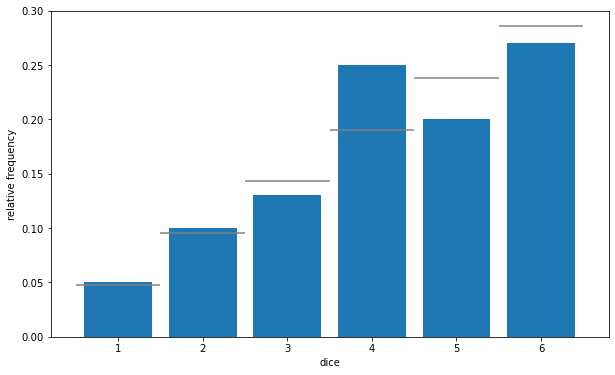

In [29]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)

ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')

ax.set_xticks(np.linspace(1.5, 6.5, 6))

ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()

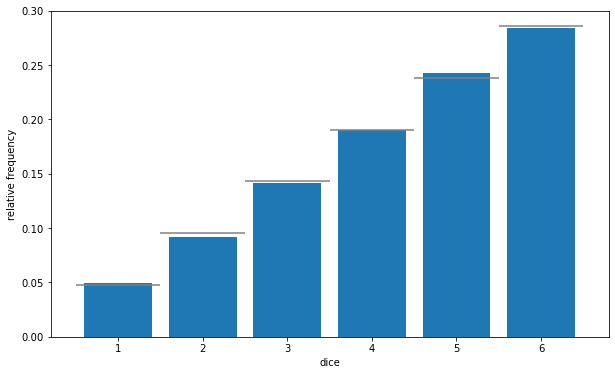

In [30]:
num_trial = 10000
sample = np.random.choice(dice, size=num_trial, p=prob)

fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)
ax.hist(sample, bins=6, range=(1, 7), density=True, rwidth=0.8)
ax.hlines(prob, np.arange(1, 7), np.arange(2, 8), colors='gray')
ax.set_xticks(np.linspace(1.5, 6.5, 6))
ax.set_xticklabels(np.arange(1, 7))
ax.set_xlabel('dice')
ax.set_ylabel('relative frequency')
plt.show()